In [1]:
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
import cv2
import scipy.ndimage as nd
import matplotlib.pyplot as plt
#from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature
from skimage import filters as skfl
from skimage.color import rgb2gray
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [195]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure(figsize=(11,11)).add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

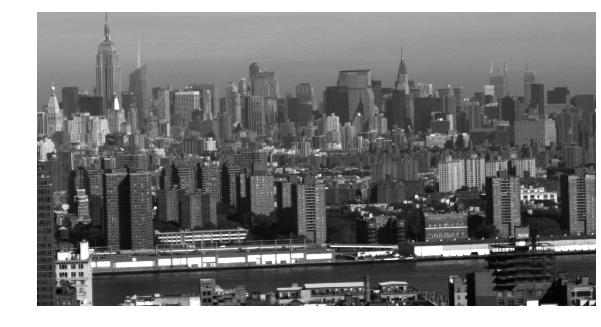

In [3]:
rawimg = np.fromfile("img1.raw", np.uint8)
rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.)
img2d /= img2d.max()
img2d = img2d.astype(float)
showme(img2d, cmap = 'gray')

In [4]:
smoothImg = nd.filters.gaussian_filter(img2d, [8, 8])
#showme(smoothImg)
#showme((img2d - smoothImg)**2)
#pl.savefig("smoothedDiff.png")

In [5]:
'''smoffsq = (img2d - smoothImg)**2
pl.hist(smoffsq.flatten())
np.where(smoffsq == smoffsq.max())
pl.figure()
pl.hist(smoffsq[smoffsq > 0.15].flatten())
'''



'smoffsq = (img2d - smoothImg)**2\npl.hist(smoffsq.flatten())\nnp.where(smoffsq == smoffsq.max())\npl.figure()\npl.hist(smoffsq[smoffsq > 0.15].flatten())\n'

In [6]:
#showme(img2d[1639:1839, 822:1022])
#showme(smoothImg[1639:1839, 822:1022])
#showme((img2d[1639:1839, 822:1022] - smoothImg[1639:1839, 822:1022])**2)
#pl.savefig("smoothedDiff.png")

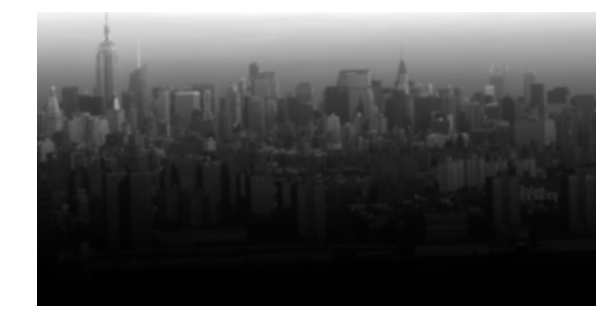

In [7]:
#skfl.sobel?
smoothImgEn = smoothImg[:,:] * (np.atleast_2d(np.linspace(1, 0, smoothImg.shape[0])).T)**2
#imgedge = skfl.sobel(smoothImgEn)
showme(smoothImgEn, cmap = 'gray')
#showme(imgedge, cmap = 'gray')

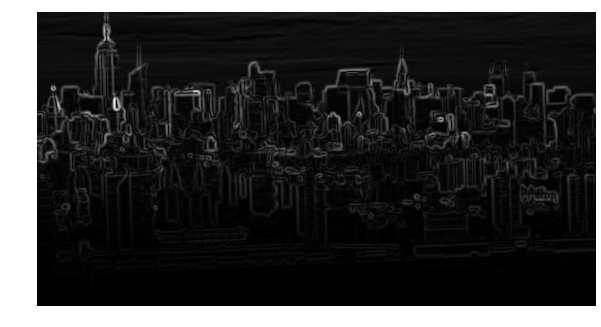

In [8]:
imgedge = skfl.sobel(smoothImgEn)
showme(imgedge, cmap = 'gray')

In [9]:
'''imgedge[:,10] #10th column
rowax = 0
colax = 1
maxbyCol = imgedge.max(rowax)
maxbyRow = imgedge.max(colax)
imgedge.argsort()[0][::-3].size'''

'imgedge[:,10] #10th column\nrowax = 0\ncolax = 1\nmaxbyCol = imgedge.max(rowax)\nmaxbyRow = imgedge.max(colax)\nimgedge.argsort()[0][::-3].size'

(array([  7.61673500e+06,   8.94753000e+05,   2.36736000e+05,
          7.16330000e+04,   1.85110000e+04,   4.79900000e+03,
          2.33300000e+03,   1.05600000e+03,   4.68000000e+02,
          3.36000000e+02]),
 array([ 0.        ,  0.00184583,  0.00369167,  0.0055375 ,  0.00738333,
         0.00922917,  0.011075  ,  0.01292083,  0.01476667,  0.0166125 ,
         0.01845833]),
 <a list of 10 Patch objects>)

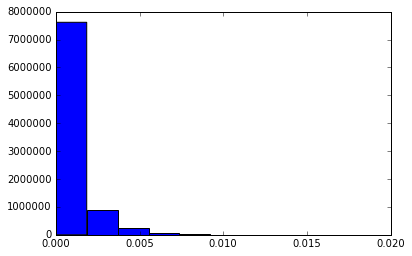

In [10]:
pl.hist(imgedge[:,:].flatten())

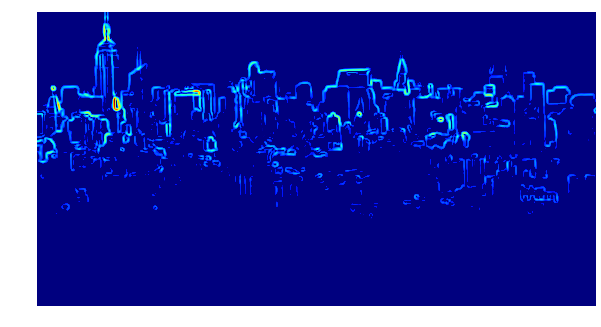

In [177]:
imgedge2 = imgedge.copy()
imgedge2[imgedge < 0.0025] = 0.0
showme(imgedge2)

In [178]:
#yTop = imgedge2.sort(0)
ymax = imgedge2.max(0)

rows = imgedge2.shape[0]
cols = imgedge2.shape[1]
envelope = [np.where(imgedge[:,i] == ymax[i])[0][-1] for i in range(cols)][1:]



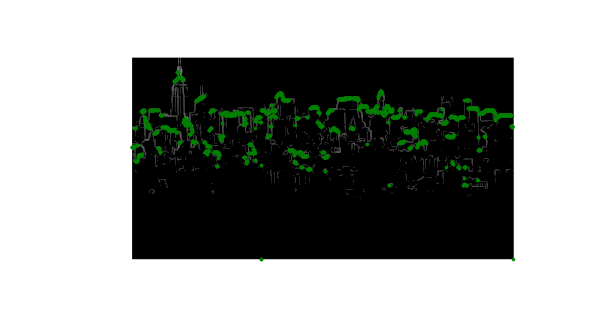

In [179]:
showme(imgedge2, cmap = 'gray')
pl.plot(np.arange(imgedge2.shape[1])[1:], envelope, 'g.')

In [203]:
indy = []

for i in range(cols):
    indy.append(np.argpartition(imgedge2[:,i], -40)[-40:].min())
    
threshold = np.mean(indy) + 100

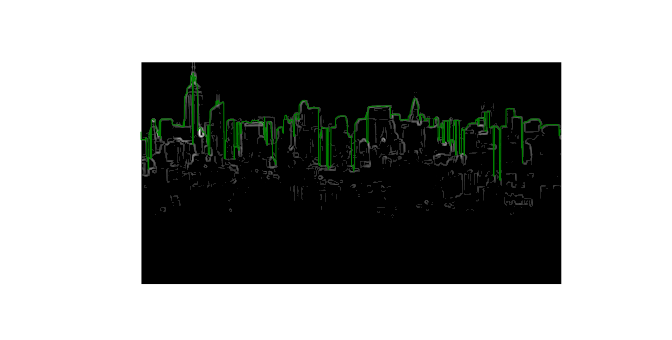

In [240]:
showme(imgedge2, cmap = 'gray')
plt.plot(np.arange(imgedge2.shape[1]), indy, 'g-', ms = 1.5)
#plt.axhline(y = threshold)

In [200]:
path = indy

    
    